## Classification 分類タスク
- Binary Classification: yes / no
    - spam or not
    - whether customer buys or not
- Multi-Class Classification
    - image classification ... is the image a dog, cat or rabbit?
- Multi-Label Classification: multiple labels for a simgle item
    - topics of a blog article

### Logistic Regression

- apply the **Sigmoid function** to a linear equation

##### Sigmoid function:
- map the output to a range of 0 - 1
    - -> outputs are interpretable as probabilities
- the threshold (usually 0.5) is used to classify instances
    - adjusting the threshold can balance precisio and recall depending on the use case

Text(0, 0.5, 'σ (z)')

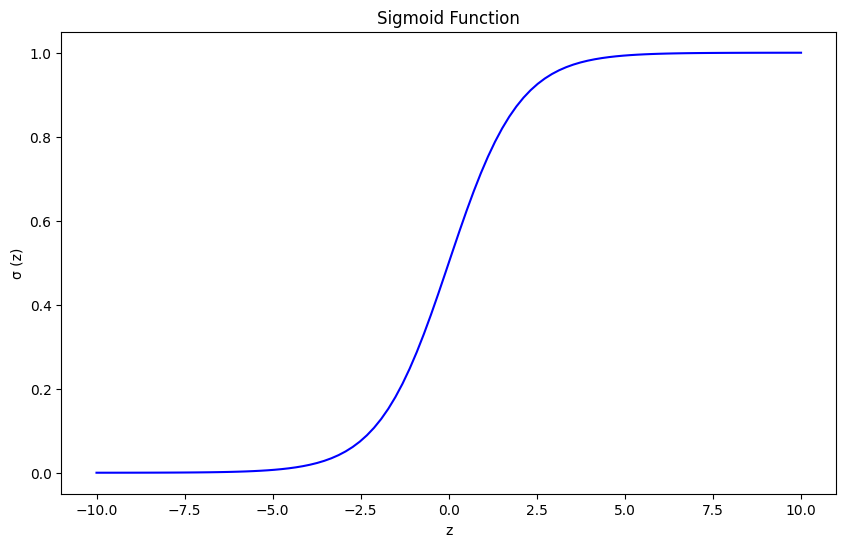

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Generate values
z = np.linspace(-10, 10, 100) # Generate 100 values from -10 to 10
sigmoid_values = sigmoid(z)

# Plotting the Sigmoid Function
plt.figure(figsize=(10, 6))
plt.plot(z, sigmoid_values, label='Sigmoid Function', color='blue')
plt.title('Sigmoid Function')
plt.xlabel('z')
plt.ylabel('σ (z)')

### Implement a logistic regression model to calssify the dataset
Predict whether a customer will make a purchase based on their age and salary

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Generate synthetic data
np.random.seed(42)
n_samples = 200     # Number of samples
X = np.random.rand(n_samples, 2) * 10   # a 2D feature space: [[x1, y1], [x2, y2], ... [x200, y200]]
y = (X[:, 0] + X[:, 1] > 10).astype(int)  # Binary target variable: 1 (True) if sum of features > 10, else 0 (False)

# Create a DataFrame
df = pd.DataFrame(X, columns=['Age', 'Salary'])
df['Purchase'] = y

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['Age', 'Salary']], df['Purchase'], test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.95
Precision: 1.0
Recall: 0.8947368421052632
F1 Score: 0.9444444444444444

Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95        21
           1       1.00      0.89      0.94        19

    accuracy                           0.95        40
   macro avg       0.96      0.95      0.95        40
weighted avg       0.95      0.95      0.95        40



## Model Evaluation

### Evaluation of regression models
- Mean Squared Error (MSE)
    - sensitive to outliers
- Mean Absolute Error (MAE)
    - more interpretable, but less sensitive to outliers
- Root Mean Squared Error (RMSE)
    - Squared root of MSE

### Evaluation of classification models
- **Accuracy**: proportion of correctly predicted instances
    - (TP + TF) / All data
    - useful when the dataset is balanced
- **Precision 適合率**: fraction of positive predictions that are correct = Out of all the predicted positives, how much was truly positive
    - TP / (TP + FP)
    - useful when false positives are costly, but false negatives are relatively okay
        - fraud detection
        - spam classification
- **Recall (Sensitive) 再現率**: fraction of positives that are correctly identified = Out of all the actual positives, how much was correctly predicted
    - TP / (TP + FN)
    - useful when missing positive instances is critical, but false positives are relatively okay
        - medical diagnosis, defective product judgment
- **F1 Score**: harmonic mean of precision and recall
    - 2 * (precision * recall) / (precision + recall)

### Analyze the model performance

c:\Users\reyad\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


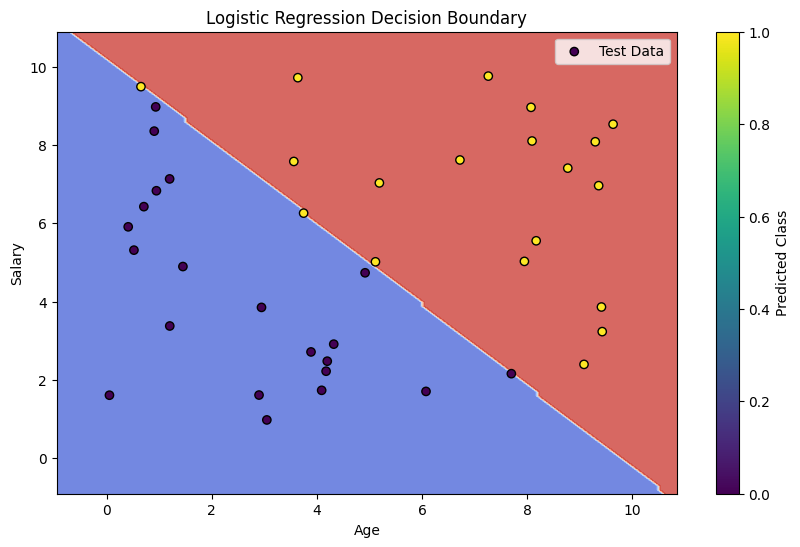

In [5]:
import matplotlib.pyplot as plt

# Plot the decision boundary
plt.figure(figsize=(10, 6))
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1     # Extend the x-axis
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1   # Extend the y-axis
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))  # Create a grid for plotting

# Predict probabilities for grid points
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])  # Predict using the logistic regression model
Z = Z.reshape(xx.shape)  # Reshape the predictions to match the grid shape

# Plot
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)  # Fill the contour plot
plt.scatter(X_test['Age'], X_test['Salary'], c=y_test, edgecolors='k', marker='o', label='Test Data')  # Scatter plot of test data
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.colorbar(label='Predicted Class')  # Add a color bar
plt.legend()
plt.show()